In [123]:
import pandas as pd 

In [124]:
data_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
Y_test = pd.read_csv("gender_submission.csv")

In [125]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
#list = [i for i in  data_train.iloc[i]["Embarked"] == "Nan" ]
data_train = data_train.drop("Cabin", axis=1)
data_train = data_train.drop("Name", axis=1)

In [127]:
data_train["Embarked"].value_counts()#data_train["Embarked"].values_counts()#[1]

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [128]:
#data_train["Embarked"]=="nan"
import numpy as np
def index():
    a = []
    for i in range (data_train.shape[0]):
        if data_train["Embarked"][i] != "S" and  data_train["Embarked"][i] != "C" and data_train["Embarked"][i] != "Q":
            a = np.concatenate((a, [i]))
    return a
alt=index()
alt

array([ 61., 829.])

In [129]:
#median = data_train["Age"].median()
#data_train["Age"].fillna(median, inplace=True)

In [130]:
data_train = data_train.dropna(subset="Embarked")#axis=0, how="any", inplace=False)

In [131]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [132]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
data_train.shape

(889, 10)

In [134]:
data_train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

In [135]:
data_train["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [136]:
data_train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [137]:
data_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [138]:
data_train["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [139]:
data_train["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [140]:
data_train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [141]:
data_train["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [142]:
data_train["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

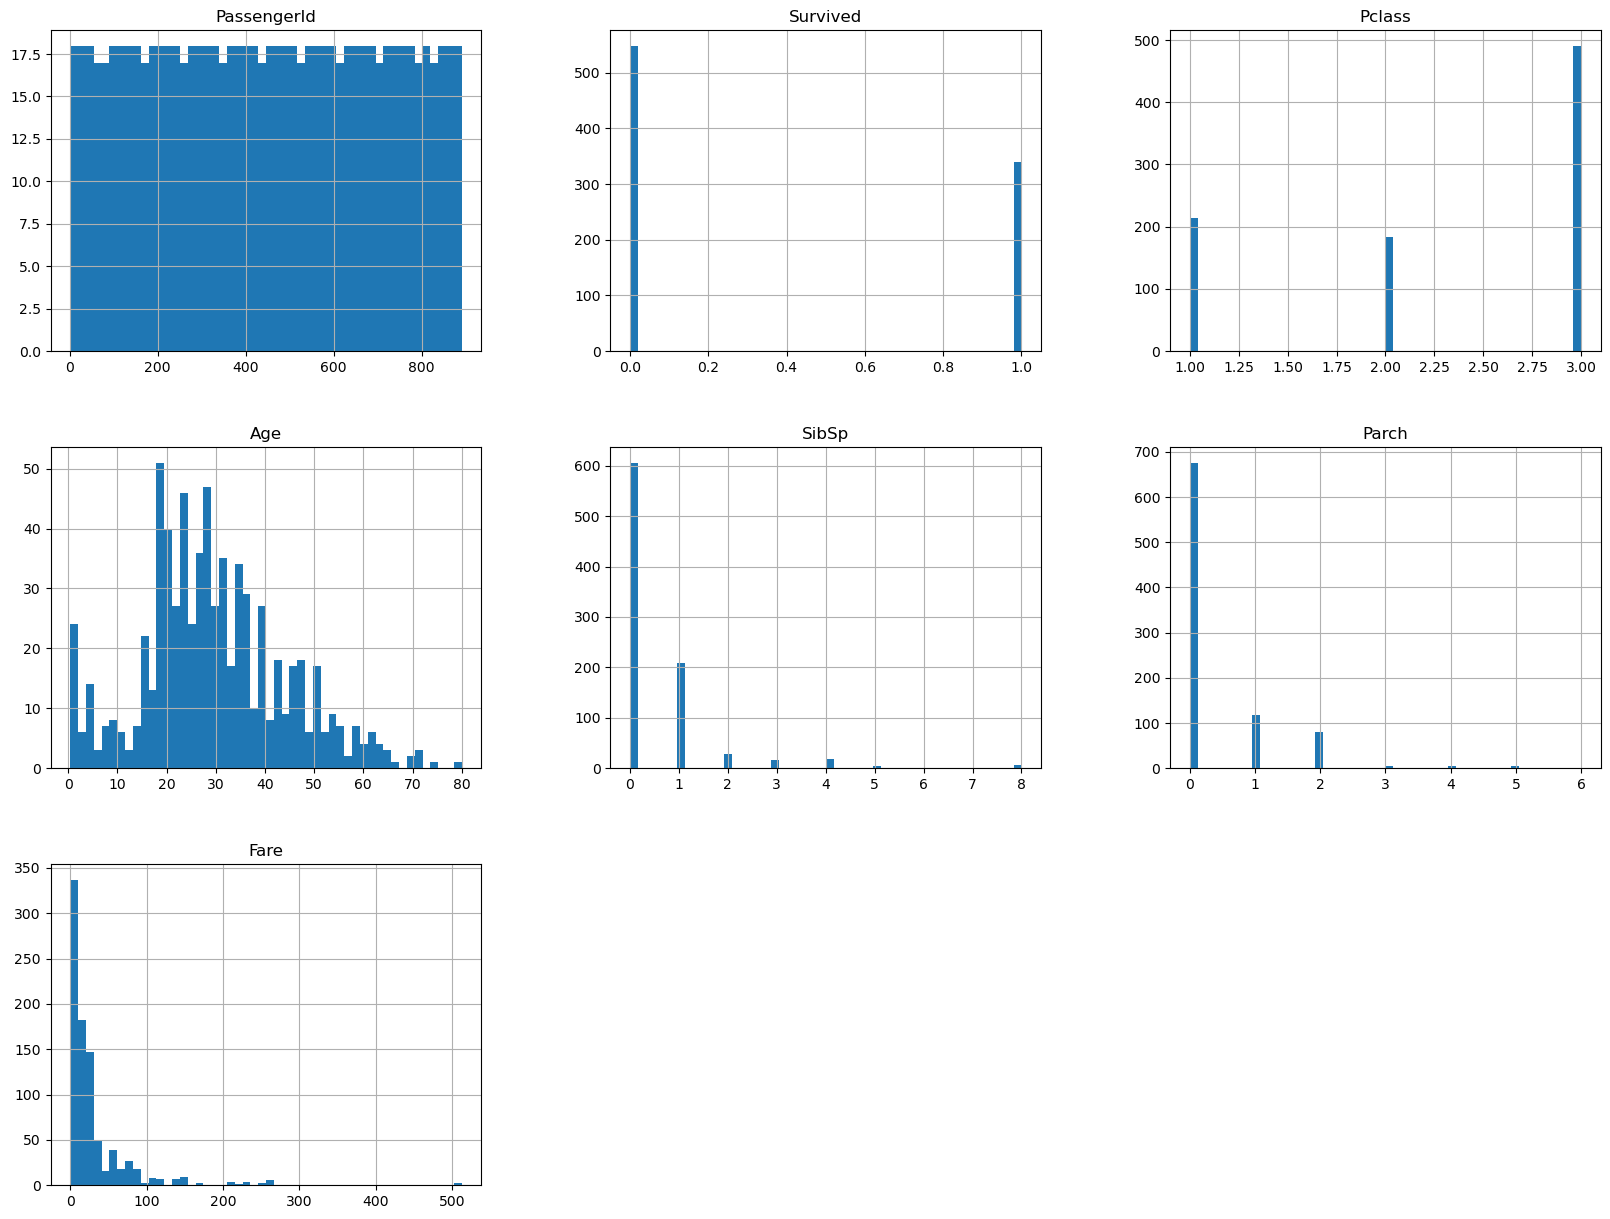

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt 
data_train.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

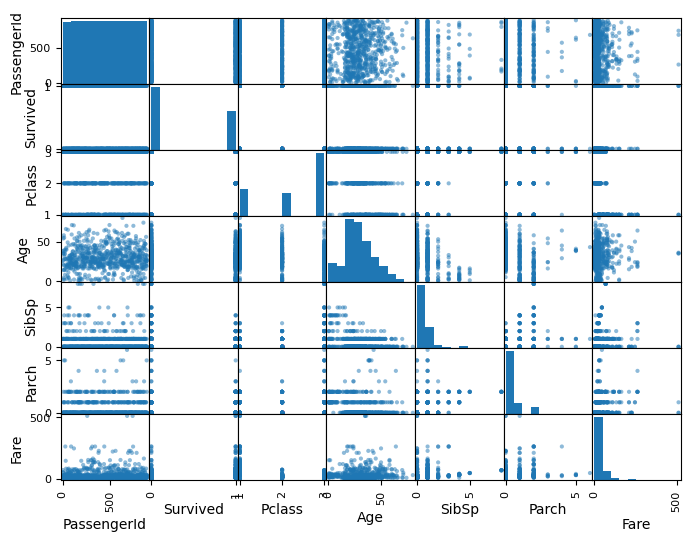

In [144]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train[data_train.columns], figsize=(8,6))

In [145]:
data_train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [146]:
#data_train

data_train = data_train.set_index("PassengerId")

#X_test = X_test.set_index("PassengerId")
X_test= X_test.set_index("PassengerId")

In [147]:
data_training= data_train.drop("Survived", axis=1)
data_label = data_train["Survived"].copy()


In [148]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
      ("imputer", SimpleImputer(strategy="median")),
      ("scaler", StandardScaler()),
   ])



In [149]:
from sklearn.preprocessing import OneHotEncoder

In [150]:

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


In [151]:
from sklearn.compose import ColumnTransformer
#
num_attribut = [ "Age", "SibSp", "Parch", "Fare"]
cat_attribut = [ "Sex", "Pclass", "Embarked"]

full_pipeline = ColumnTransformer([
         ("num", num_pipeline, num_attribut),
         ("cat", cat_pipeline, cat_attribut),
])


In [152]:
data_training.shape

(889, 8)

In [153]:
data_training[num_attribut + cat_attribut].columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'Embarked'], dtype='object')

In [154]:
data_training= full_pipeline.fit_transform(
    data_training[num_attribut + cat_attribut])


data_training

array([[-0.56367407,  0.43135024, -0.47432585, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66921696,  0.43135024, -0.47432585, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25545131, -0.47519908, -0.47432585, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25545131, -0.47519908, -0.47432585, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20688282, -0.47519908, -0.47432585, ...,  0.        ,
         1.        ,  0.        ]])

In [155]:
data_training.shape

(889, 12)

In [156]:
data_training

array([[-0.56367407,  0.43135024, -0.47432585, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66921696,  0.43135024, -0.47432585, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25545131, -0.47519908, -0.47432585, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25545131, -0.47519908, -0.47432585, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20688282, -0.47519908, -0.47432585, ...,  0.        ,
         1.        ,  0.        ]])

In [157]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=18)
forest_clf.fit(data_training, data_label)


RandomForestClassifier(random_state=18)

In [158]:
X_test = full_pipeline.transform(X_test[num_attribut + cat_attribut])
Y_pred1 = forest_clf.predict(X_test)


In [159]:
Y_pred1

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [163]:
import pandas as pd
RF = pd.DataFrame(Y_pred1, columns =["prediction"]).to_csv("RF3.csv")

In [164]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [165]:

knn = KNeighborsClassifier()
# creation plage de valeur dans la quelle la meilleure valeur de k sera recherche
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2,3, 4, 5, 6, 7]}]

grid = GridSearchCV( knn, param_grid, cv=10, scoring = "accuracy", verbose=4)

# ajustement du modelle sur nos donnees
grid.fit(data_training, data_label)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ...n_neighbors=1, weights=uniform;, score=0.674 total time=   0.0s
[CV 2/10] END ...n_neighbors=1, weights=uniform;, score=0.742 total time=   0.0s
[CV 3/10] END ...n_neighbors=1, weights=uniform;, score=0.719 total time=   0.0s
[CV 4/10] END ...n_neighbors=1, weights=uniform;, score=0.764 total time=   0.0s
[CV 5/10] END ...n_neighbors=1, weights=uniform;, score=0.809 total time=   0.0s
[CV 6/10] END ...n_neighbors=1, weights=uniform;, score=0.787 total time=   0.0s
[CV 7/10] END ...n_neighbors=1, weights=uniform;, score=0.775 total time=   0.0s
[CV 8/10] END ...n_neighbors=1, weights=uniform;, score=0.697 total time=   0.0s
[CV 9/10] END ...n_neighbors=1, weights=uniform;, score=0.742 total time=   0.0s
[CV 10/10] END ..n_neighbors=1, weights=uniform;, score=0.773 total time=   0.0s
[CV 1/10] END ..n_neighbors=1, weights=distance;, score=0.674 total time=   0.0s
[CV 2/10] END ..n_neighbors=1, weights=distanc

C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 6/10] END ..n_neighbors=3, weights=distance;, score=0.831 total time=   0.0s
[CV 7/10] END ..n_neighbors=3, weights=distance;, score=0.787 total time=   0.0s
[CV 8/10] END ..n_neighbors=3, weights=distance;, score=0.764 total time=   0.0s
[CV 9/10] END ..n_neighbors=3, weights=distance;, score=0.798 total time=   0.0s
[CV 10/10] END .n_neighbors=3, weights=distance;, score=0.784 total time=   0.0s
[CV 1/10] END ...n_neighbors=4, weights=uniform;, score=0.730 total time=   0.0s
[CV 2/10] END ...n_neighbors=4, weights=uniform;, score=0.820 total time=   0.0s
[CV 3/10] END ...n_neighbors=4, weights=uniform;, score=0.742 total time=   0.0s
[CV 4/10] END ...n_neighbors=4, weights=uniform;, score=0.809 total time=   0.0s
[CV 5/10] END ...n_neighbors=4, weights=uniform;, score=0.820 total time=   0.0s
[CV 6/10] END ...n_neighbors=4, weights=uniform;, score=0.787 total time=   0.0s
[CV 7/10] END ...n_neighbors=4, weights=uniform;, score=0.854 total time=   0.0s
[CV 8/10] END ...n_neighbors

C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 5/10] END ...n_neighbors=6, weights=uniform;, score=0.843 total time=   0.0s
[CV 6/10] END ...n_neighbors=6, weights=uniform;, score=0.787 total time=   0.0s
[CV 7/10] END ...n_neighbors=6, weights=uniform;, score=0.876 total time=   0.0s
[CV 8/10] END ...n_neighbors=6, weights=uniform;, score=0.787 total time=   0.0s
[CV 9/10] END ...n_neighbors=6, weights=uniform;, score=0.865 total time=   0.0s
[CV 10/10] END ..n_neighbors=6, weights=uniform;, score=0.761 total time=   0.0s
[CV 1/10] END ..n_neighbors=6, weights=distance;, score=0.742 total time=   0.0s
[CV 2/10] END ..n_neighbors=6, weights=distance;, score=0.798 total time=   0.0s
[CV 3/10] END ..n_neighbors=6, weights=distance;, score=0.708 total time=   0.0s
[CV 4/10] END ..n_neighbors=6, weights=distance;, score=0.831 total time=   0.0s
[CV 5/10] END ..n_neighbors=6, weights=distance;, score=0.820 total time=   0.0s
[CV 6/10] END ..n_neighbors=6, weights=distance;, score=0.854 total time=   0.0s
[CV 7/10] END ..n_neighbors=

C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=4)

In [166]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [167]:
grid.best_score_

0.8076353421859039

In [168]:
import joblib
joblib.dump(grid, "grid_knn")

['grid_knn']

In [169]:

Y_pred2 = grid.predict(X_test)

#data_label = data_train["Survived"].copy()

C:\Users\jaure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [173]:
Y_pred2 = pd.DataFrame(Y_pred2, columns =["prediction"])

In [171]:
Y_test = Y_test["Survived"].copy()
#Y_pred.shape, data_label.shape

In [174]:
Y_pred2 = Y_pred2["prediction"]
Y_pred2

0      0
1      0
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: prediction, Length: 418, dtype: int64

In [175]:
Y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred2)

array([[228,  38],
       [ 25, 127]], dtype=int64)

In [177]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(data_training, data_label)
svm_predict = svm_clf.predict(X_test)

In [178]:
confusion_matrix(Y_test, svm_predict)

array([[255,  11],
       [ 13, 139]], dtype=int64)

In [ ]:
import joblib
joblib.dump(, "KNeighborsClassifier")

In [613]:
import joblib
joblib.dump(KNeighborsClassifier, "KNeighborsClassifier")

['KNeighborsClassifier']

In [614]:
from sklearn.metrics import recall_score

In [615]:
recall_score ( data_label, Y_pred )

0.9941176470588236